In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-detection/fashion-mnist_test.csv
/kaggle/input/digit-detection/fashion-mnist_train.csv


In [2]:
import numpy as np
import pandas as pd

def output(x_org):
    unique = np.unique(x_org.label)
    labels = np.zeros((x_org.shape[0], 10))
    for i, val in enumerate(unique):
        labels[:, i] = np.where(x_org.label == val, 1, 0)
    return labels

def standardize_inputs(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    return standardized_data

def relu(x):
    return np.maximum(x, 0)

def derivative_relu(x):
    return np.array(x > 0, dtype=np.float32)

def derivative_tanh(x):
    return 1 - np.power(np.tanh(x), 2)

x_org = pd.read_csv("/kaggle/input/digit-detection/fashion-mnist_train.csv")
test = pd.read_csv("/kaggle/input/digit-detection/fashion-mnist_test.csv")

test_y = output(test)
test_x = ((test).T)[1:] / 255.0
test_x = standardize_inputs(test_x)

dev_size = 20000
labels = output(x_org)
x = ((x_org).T)[1:] / 255.0
x = standardize_inputs(x)

# Use copy() to create independent copies
train_x = x.iloc[:, dev_size:].copy()
dev_x = x.iloc[:, :dev_size].copy()

labels = labels.T
labels_dev = labels[:, :dev_size].copy()
labels = labels[:, dev_size:].copy()



In [3]:

def params(x, h, label):
    w1 = np.random.randn(h, x.shape[0])*0.01
    w2 = np.random.randn(label.shape[0], h)*0.01
    b1 = np.zeros((h, 1))
    b2 = np.zeros((label.shape[0], 1))
    parameters = {
        "w1": w1,
        "w2": w2,
        "b1": b1,
        "b2": b2
    }
    return parameters


def forward_propagation(parameters, x):
    z1 = np.dot(parameters["w1"], x) + parameters["b1"]
    a1 = relu(z1)
    z2 = np.dot(parameters["w2"], a1) + parameters["b2"]
    a2 = softmax(z2)
       
    forward = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward



def backward_propagation(x, y, parameters,forward):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    a1 = forward['a1']
    a2 = forward['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_relu(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

def update_parameters(parameters, gradients, learning_rate):
    parameters["w2"] = parameters["w2"] - learning_rate * gradients["dw2"]
    parameters["w1"] = parameters["w1"] - learning_rate * gradients["dw1"]
    parameters["b2"] = parameters["b2"] - learning_rate * gradients["db2"]
    parameters["b1"] = parameters["b1"] - learning_rate * gradients["db1"]
    return parameters




In [4]:
def leaky_relu(coef, z):
    return np.maximum(0, z)

def softmax(z):
    expz = np.exp(z)  # Subtracting max to improve numerical stability
    return expz / np.sum(expz, axis=0)



In [5]:
def cost_func(pred, labels):
    m = labels.shape[1]
    cost = -(1/m)*np.sum(labels*np.log(pred))
    return cost


In [6]:
def model(train_x, labels, learning_rate, iterations):
    parameters = params(train_x, 300, labels)
    cost=[]
    for i in range(iterations):
        forward = forward_propagation(parameters,train_x)
        cost.append(cost_func(forward['a2'], labels))
       
        if(i%10==0):
             print(cost_func(forward['a2'], labels))
        if(i%100==0):
            print("its the ",i,"th iteration")
        gradients = backward_propagation(train_x, labels, parameters, forward)
        parameters = update_parameters(parameters, gradients, learning_rate)
    return parameters,cost



In [7]:
learned_parameters,cost = model(train_x, labels, 0.5, 800)


2.3018732651905895
its the  0 th iteration
1.6376487205460506
1.3285400753075125
1.1552394711734721
1.04541536786298
0.9696530895824667
0.9140914075367659
0.8714461771861508
0.8375520584727927
0.8098629787819344
0.7867371175445584
its the  100 th iteration
0.7670689209203403
0.7500867111165909
0.7352354190844057
0.7221054081048176
0.7103876781572895
0.6998446924335691
0.6902906463019692
0.6815780707326538
0.6735883613269397
0.6662250246297584
its the  200 th iteration
0.6594086663619894
0.6530733083288791
0.6471636248655854
0.6416328339197535
0.6364410877451286
0.6315542406357814
0.6269427739534236
0.6225810948702369
0.6184468718888393
0.6145204816475842
its the  300 th iteration
0.6107846340559004
0.6072239723688001
0.6038248554709178
0.6005751256124736
0.5974638274019258
0.5944811181460492
0.5916181942424649
0.5888670834471744
0.5862204787845743
0.583671763119043
its the  400 th iteration
0.5812148796655044
0.5788442856938626
0.5765548998147151
0.5743420774990756
0.5722015111225944
0

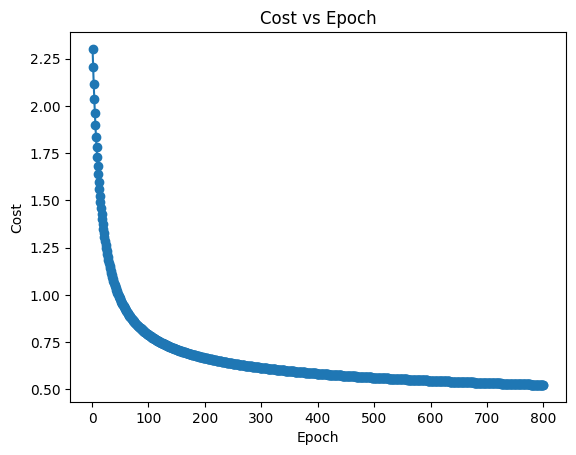

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(cost) + 1), cost, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch')
plt.show()

def test(test_x,test1,parameters):
    forward=forward_propagation(parameters,test_x)
    output_vals=forward["a2"]
    output1=np.argmax(output_vals,0,keepdims=True)
    test1=np.argmax(test1,0,keepdims=True)
    accuracy = np.mean(output1== test1)*100
    print("the accuracy is: ",accuracy)
    return output1,test1

In [9]:
test(train_x,labels,learned_parameters)
test(dev_x,labels_dev,learned_parameters)
result,test1=test(test_x,test_y.T,learned_parameters)

the accuracy is:  81.8
the accuracy is:  81.62
the accuracy is:  81.67999999999999


(10000,)
(10000,)


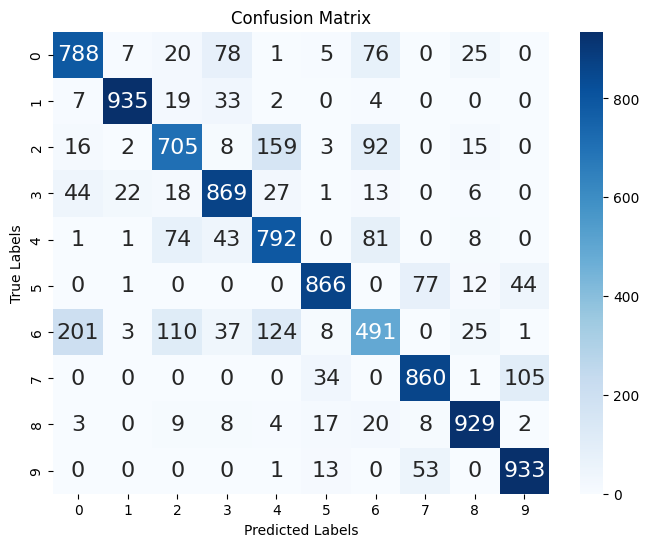

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
test1 = test1.flatten()
result = result.flatten()
print(result.shape)
print(test1.shape)
plt.figure(figsize=(8, 6))


cm = confusion_matrix(test1,result)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [11]:
from sklearn.metrics import f1_score
f1 = f1_score(test1, result,average='micro')

print("the f1 score is", f1)

the f1 score is 0.8167999999999999
